In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from itertools import chain
print(1)
%matplotlib inline

1


# Question 1 - Image formation

## Section A

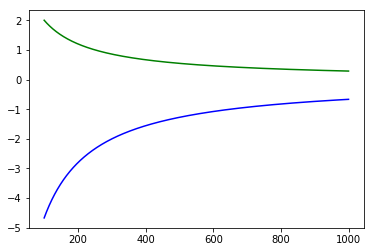

In [3]:
# Avi's position
z_w = np.arange(100, 1000) # The z coordinate of avi moves in the range of 100 to 1000.
p0w_x = np.zeros_like(z_w)
p1w_x = np.full_like(z_w, 100)

# Camera world position
c_x = 70
c_z = -50

# Camerea focal length
f = 10

# =================  Change these to the solution of the question
x0_i_list = np.zeros_like(z_w, dtype=float)  # len is 900
x1_i_list = np.zeros_like(z_w, dtype=float)
# =================

# put camera in (0,0)
c_x_normalized = 0
c_z_normalized = 0
p0w_x_normalized = p0w_x - c_x
p1w_x_normalized = p1w_x - c_x
z_w_normalized = z_w - c_z
for i, coordinate in enumerate(z_w_normalized):
    xw0 = p0w_x_normalized[i]
    xw1 = p1w_x_normalized[i]
    zw = z_w_normalized[i]
    x0_i = xw0 * f / float(zw)
    x1_i = xw1 * f / float(zw)
    x0_i_list[i] = x0_i
    x1_i_list[i] = x1_i


plt.plot(z_w, x0_i_list, color='blue')
plt.plot(z_w, x1_i_list, color='green')


## Section B

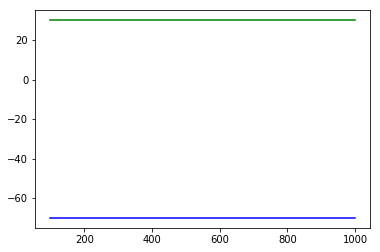

In [4]:
# Avi's position
z_w = np.arange(100, 1000) # The z coordinate of avi moves in the range of 100 to 1000.
p0w_x = np.zeros_like(z_w)
p1w_x = 100 * np.ones_like(z_w)

# =================  Change these to the solution of the question
x0_i_list = np.zeros_like(z_w, dtype=float)  # len is 900
x1_i_list = np.zeros_like(z_w, dtype=float)
# =================

# put camera in (0,0)
c_x_normalized = 0
c_z_normalized = 0
p0w_x_normalized = p0w_x - c_x
p1w_x_normalized = p1w_x - c_x
z_w_normalized = z_w - c_z
projection_z = f
for i, coordinate in enumerate(z_w_normalized):
    xw0 = p0w_x_normalized[i]
    xw1 = p1w_x_normalized[i]
    zw = z_w_normalized[i]
    x0_i = xw0
    x1_i = xw1
    x0_i_list[i] = x0_i
    x1_i_list[i] = x1_i


plt.plot(z_w, x0_i_list, color='blue')
plt.plot(z_w, x1_i_list, color='green')

## Section D

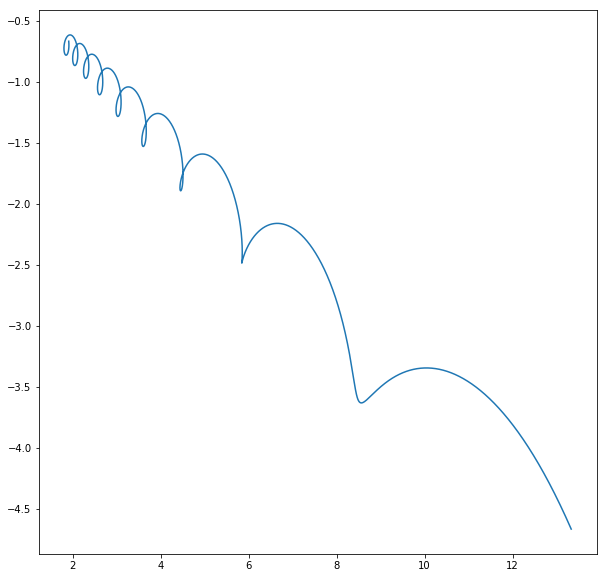

In [5]:
z_w = np.arange(100, 1000, 0.001)
# Camerea focal length
f = 10
# Camera world position
c_x = 70
c_z = -50


# =================  Change these to the solution of the question
x_w = np.sin((z_w-100)/100.0*2*np.pi)*10
y_w = (np.cos((z_w-100)/100.0*2*np.pi) * 10) + 190
#=====================

# put camera in (0,0)
c_x_normalized = 0
c_z_normalized = 0
x_w_normalized = x_w - c_x
z_w_normalized = z_w - c_z

# for i, coordinate in enumerate(z_w_normalized):
#     xw0 = p0w_x_normalized[i]
#     xw1 = p1w_x_normalized[i]
#     zw = z_w_normalized[i]
#     x0_i = xw0
#     x1_i = xw1
#     x0_i_list[i] = x0_i
#     x1_i_list[i] = x1_i



x_i = x_w_normalized * f / z_w_normalized
y_i = y_w * f / z_w_normalized

_, ax = plt.subplots(figsize=(10, 10))
ax.plot(y_i, x_i)
# len(x_w_normalized)

# Question 2 - Camera calibration

## Section A

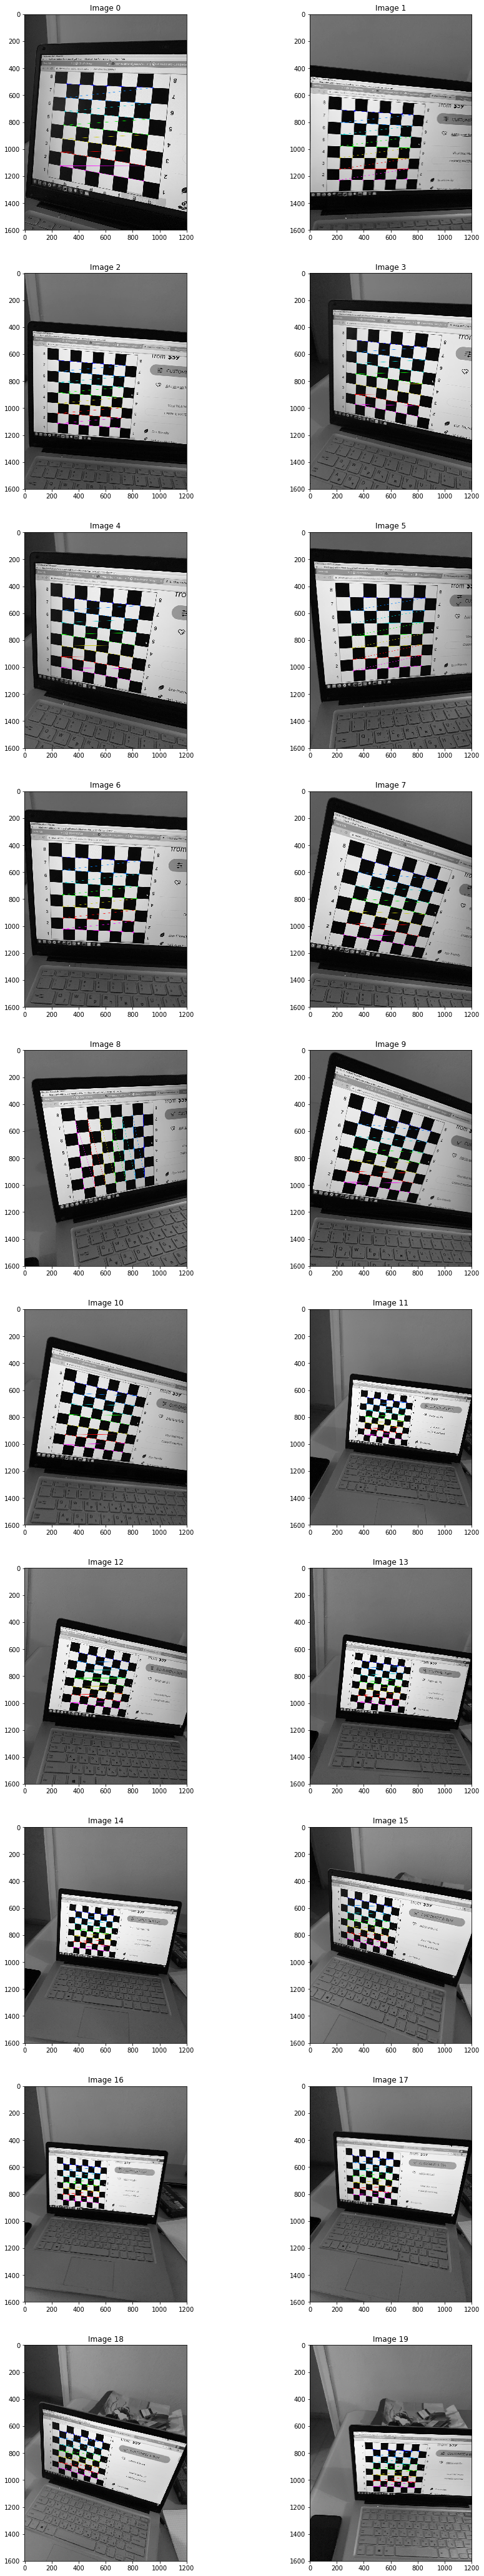

In [6]:
from itertools import product

paths_nums = range(1, 21)  # 21
paths = ["/home/mypc/bgu/vision/computational_vision/assignment1/photos/{}.jpeg".format(num) for num in paths_nums]
corners_list = []
shape=None
images = []
images_with_lines = []
pattern_size = (7, 7)
for path in paths:
    chess_img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    images.append(chess_img)

    found, corners = cv2.findChessboardCorners(chess_img, pattern_size)
    corners_list.append(corners)

    color = cv2.cvtColor(chess_img, cv2.COLOR_GRAY2RGB)
    cv2.drawChessboardCorners(color, pattern_size, corners, found)
    images_with_lines.append(color)
    
    shape = chess_img.shape

# corncers = []# Add code for detecting chessboard corners

# image_corners = [] # Code for drawing chessboard corners

def display_images(_images, cols, rows):
    _, axes = plt.subplots(cols, rows, figsize=(15,75))
    for (i, image), ax in zip(enumerate(_images), chain.from_iterable(axes)):
        ax.imshow(image)
        ax.set_title("Image {}".format(i))

display_images(images_with_lines, 10, 2)

## Section B

In [7]:
from itertools import product

xs, ys = pattern_size
world_points = np.array(
    [(x, y, 0) for y, x in product(range(ys), range(xs))],
                        dtype=np.float32)
world_points

array([[0., 0., 0.],
       [1., 0., 0.],
       [2., 0., 0.],
       [3., 0., 0.],
       [4., 0., 0.],
       [5., 0., 0.],
       [6., 0., 0.],
       [0., 1., 0.],
       [1., 1., 0.],
       [2., 1., 0.],
       [3., 1., 0.],
       [4., 1., 0.],
       [5., 1., 0.],
       [6., 1., 0.],
       [0., 2., 0.],
       [1., 2., 0.],
       [2., 2., 0.],
       [3., 2., 0.],
       [4., 2., 0.],
       [5., 2., 0.],
       [6., 2., 0.],
       [0., 3., 0.],
       [1., 3., 0.],
       [2., 3., 0.],
       [3., 3., 0.],
       [4., 3., 0.],
       [5., 3., 0.],
       [6., 3., 0.],
       [0., 4., 0.],
       [1., 4., 0.],
       [2., 4., 0.],
       [3., 4., 0.],
       [4., 4., 0.],
       [5., 4., 0.],
       [6., 4., 0.],
       [0., 5., 0.],
       [1., 5., 0.],
       [2., 5., 0.],
       [3., 5., 0.],
       [4., 5., 0.],
       [5., 5., 0.],
       [6., 5., 0.],
       [0., 6., 0.],
       [1., 6., 0.],
       [2., 6., 0.],
       [3., 6., 0.],
       [4., 6., 0.],
       [5., 6

## Section C - Perform a calibration

In [8]:
world_points_list = [world_points for i in range(len(paths_nums))]
retval, cameraMatrix, distCoeffs, rvecs, tvecs = cv2.calibrateCamera(
    objectPoints=world_points_list,
    imagePoints=corners_list,
    imageSize=shape[::-1],
    cameraMatrix=None,
    distCoeffs=None)

np.set_printoptions(suppress=True)
cameraMatrix

array([[1219.65235535,    0.        ,  629.78131154],
       [   0.        , 1221.15988781,  767.26092803],
       [   0.        ,    0.        ,    1.        ]])

## Section D  - Camera matrix

In [9]:
r_matrix, _ = cv2.Rodrigues(np.array(rvecs[0]))
row, col = 3, 3

f_mat = np.zeros((4, 4))
f_mat[:row, :col] = r_matrix
f_mat[:row, col] = np.array(tvecs[0]).flatten()
f_mat[row, col] = 1


k_mat = np.zeros((4, 4))
k_mat[:row, :col] = cameraMatrix
f_mat[row, col] = 1



m_mat = k_mat * f_mat

m_mat

array([[1179.17030026,   -0.        ,  150.76919419,   -0.        ],
       [   0.        , 1216.10567681,    3.69750814,   -0.        ],
       [  -0.        ,    0.        ,    0.97090924,    0.        ],
       [   0.        ,    0.        ,    0.        ,    0.        ]])

## Section E

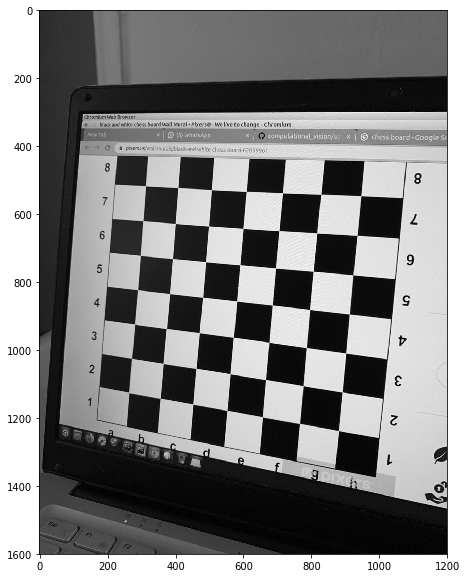

In [30]:
def display_image(_img, figsize = (10,10)):
    plt.figure(figsize=figsize)
    plt.imshow(_img)

image_num = 1
path = "/home/mypc/bgu/vision/computational_vision/assignment1/photos/{}.jpeg".format(image_num)
image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
# found, corners = cv2.findChessboardCorners(image, pattern_size)
color = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
display_image(color)


#     chess_img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
#     images.append(chess_img)

#     found, corners = cv2.findChessboardCorners(chess_img, pattern_size)
#     corners_list.append(corners)

#     color = cv2.cvtColor(chess_img, cv2.COLOR_GRAY2RGB)
#     cv2.drawChessboardCorners(color, pattern_size, corners, found)
#     images_with_lines.append(color)
    
#     shape = chess_img.shape


In [31]:
#Projection using camera matrix

def to_homogonos(points):
    return np.array([[x,y,z,1] for x,y,z in points])
                    
i = 1
world_points_h = to_homogonos(world_points)
m_projected_world_points_h =  np.array([p @ m_mat for p in world_points_h])
# len(m_projected_world_points_h)
cv2.drawChessboardCorners(image, pattern_size, m_projected_world_points_h, True)


error: OpenCV(4.1.1) /io/opencv/modules/calib3d/src/calibinit.cpp:2094: error: (-215:Assertion failed) nelems >= 0 in function 'drawChessboardCorners'


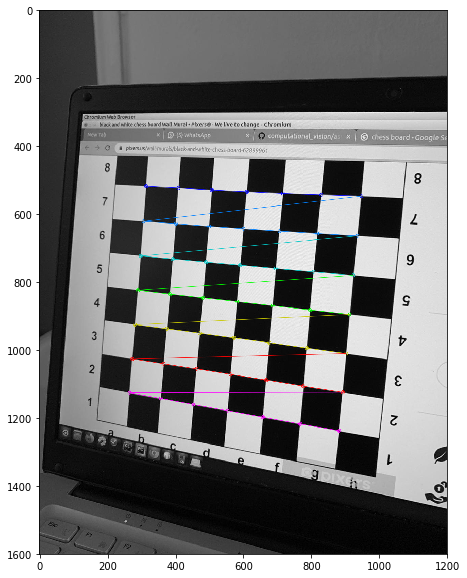

In [32]:
#Projection using cv2.projectPoints
# path = "/home/mypc/bgu/vision/computational_vision/assignment1/photos/{}.jpeg".format(image_num)
# image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
projected_points, _ = cv2.projectPoints(world_points, rvecs[0], tvecs[0],
                                        cameraMatrix, distCoeffs)

cv2.drawChessboardCorners(color, pattern_size, projected_points, True)
display_image(color)



## Section F

[0. 0. 0.]


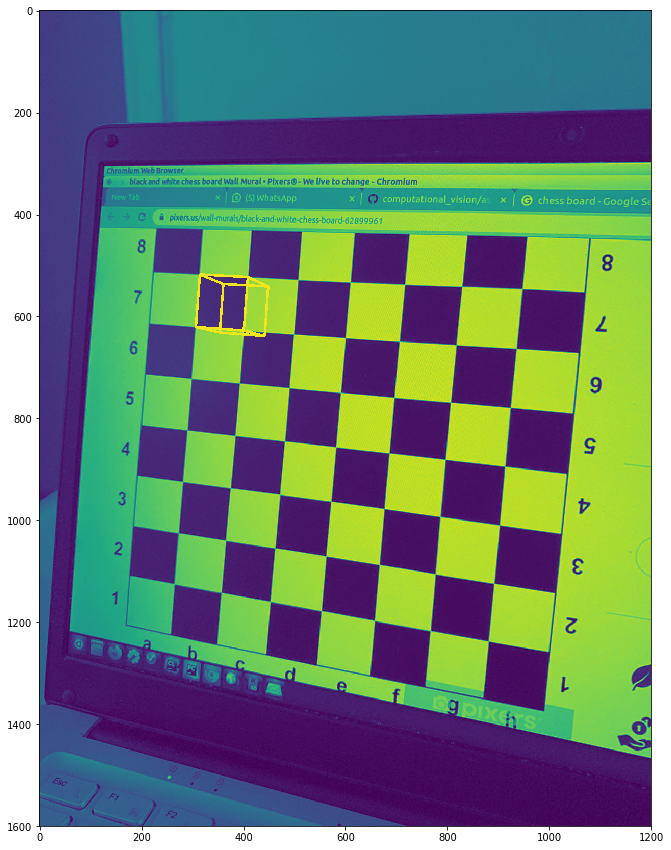

In [63]:
# Draw cube here
image_num = 1
path = "/home/mypc/bgu/vision/computational_vision/assignment1/photos/{}.jpeg".format(image_num)
image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
# color = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

def square_to_cube(square):
    c = np.array([
        [0, 0, 0],
        [1, 0, 0],
        [0, 1, 0],
        [1, 1, 0],
        [0, 0, 1],
        [1, 0, 1],
        [0, 1, 1],
        [1, 1, 1],
    ], dtype=float)
    c[:4, :2] = square
    c[4:8, :2] = square
    return c

square = np.array([
    [0, 0],
    [1, 0],
    [0, 1],
    [1, 1],
], dtype=float)
cube = square_to_cube(square)
print(cube[0])
_cube_projected_points, _ = cv2.projectPoints(cube, rvecs[0], tvecs[0], cameraMatrix, distCoeffs)

to_tuple = lambda arr: tuple([int(x) for x in arr[0]])

def draw_cube(cube_projected_points, _image, line_color=(250, 0, 0)):
#     cv2.line(image_1, to_tuple(cube_projected_points[0]), to_tuple(cube_projected_points[0]), color=3)
    # drawing lines
    d = {'color':line_color, 'thickness':4}
    cv2.line(_image, to_tuple(cube_projected_points[0]), to_tuple(cube_projected_points[2]), **d)
    cv2.line(_image, to_tuple(cube_projected_points[0]), to_tuple(cube_projected_points[1]), **d)
    cv2.line(_image, to_tuple(cube_projected_points[2]), to_tuple(cube_projected_points[3]), **d)
    cv2.line(_image, to_tuple(cube_projected_points[0]), to_tuple(cube_projected_points[4]), **d)

    cv2.line(_image, to_tuple(cube_projected_points[1]), to_tuple(cube_projected_points[3]), **d)
    cv2.line(_image, to_tuple(cube_projected_points[1]), to_tuple(cube_projected_points[5]), **d)

    cv2.line(_image, to_tuple(cube_projected_points[5]), to_tuple(cube_projected_points[4]), **d)
    cv2.line(_image, to_tuple(cube_projected_points[5]), to_tuple(cube_projected_points[7]), **d)

    cv2.line(_image, to_tuple(cube_projected_points[7]), to_tuple(cube_projected_points[6]), **d)
    cv2.line(_image, to_tuple(cube_projected_points[7]), to_tuple(cube_projected_points[3]), **d)

    cv2.line(_image, to_tuple(cube_projected_points[4]), to_tuple(cube_projected_points[6]), **d)
    cv2.line(_image, to_tuple(cube_projected_points[4]), to_tuple(cube_projected_points[5]), **d)

    cv2.line(_image, to_tuple(cube_projected_points[2]), to_tuple(cube_projected_points[6]), **d)


#     _, axes = plt.subplots(2, 2, figsize=(100, 100))
#     for (i, image), ax in zip(enumerate([image]), chain.from_iterable(axes)):
#         ax.imshow(image)
#         ax.set_title("Image {}".format(i))
    display_image(_image, figsize=(15,15))

draw_cube(_cube_projected_points, image)

[[ 0.         0.         0.       ]
 [ 0.8660254  0.5        0.       ]
 [-0.5        0.8660254  0.       ]
 [ 0.3660254  1.3660254  0.       ]
 [ 0.         0.         1.       ]
 [ 0.8660254  0.5        1.       ]
 [-0.5        0.8660254  1.       ]
 [ 0.3660254  1.3660254  1.       ]]


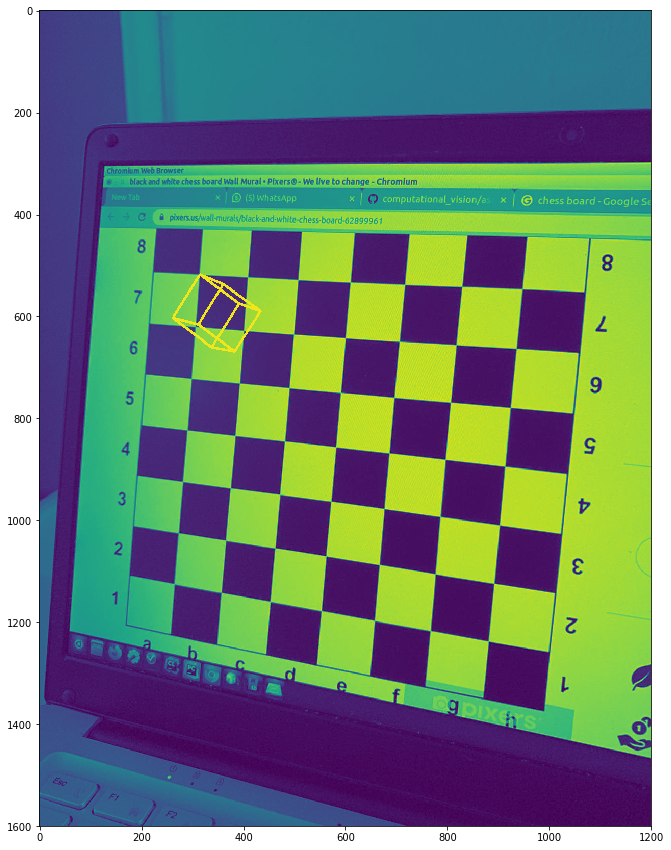

In [62]:
# Draw rotated cube here
image_num = 1
path = "/home/mypc/bgu/vision/computational_vision/assignment1/photos/{}.jpeg".format(image_num)
image_1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

teta = np.pi/6
rotation_mat = np.array([
    [np.cos(teta), -np.sin(teta)],
    [np.sin(teta), np.cos(teta)],
], dtype=float)
rotated_square = np.array([rotation_mat.dot(p) for p in square], dtype=float)
rotated_cube = square_to_cube(rotated_square)
print(rotated_cube)
rotated_cube_projected_points, _ = cv2.projectPoints(rotated_cube, rvecs[image_num-1], tvecs[image_num-1], cameraMatrix, distCoeffs)

draw_cube(rotated_cube_projected_points, image_1)